<a href="https://colab.research.google.com/github/deepakHonakeri05/Leaf-Disease-Classifier/blob/master/Res50_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting Dataset

!git clone https://github.com/deepakHonakeri05/yolo_dataset.git

In [ ]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

import cv2

import os

import numpy as np
from keras.preprocessing import image

Using TensorFlow backend.


In [ ]:
NUM_CLASSES = 2

RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']


model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))


# model.add(Dense(1024, activation = DENSE_LAYER_ACTIVATION))
# 2nd layer as Dense for 8-class classification
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

#compiling
model.compile(optimizer = 'adam', loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

# model.load_weights('./peach.h5')


In [ ]:
model.summary()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range = 270,
    brightness_range = (-2,2),
        shear_range=0.2,
        zoom_range=0.3,
    vertical_flip=True,
    validation_split=0.3,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(vertical_flip=True,
                                 horizontal_flip=True,
                                 rotation_range=180,
                                 zoom_range=0.2)

val_datagen = ImageDataGenerator(vertical_flip=True,
                                 horizontal_flip=True,
                                 rotation_range=180,
                                 zoom_range=0.2)

train_set = train_datagen.flow_from_directory(
        'yolo_dataset/Peach/train/',
        target_size=(224,224),
        batch_size=64,
        seed=101, 
        shuffle=True,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'yolo_dataset/Peach/test/',
        target_size=(224, 224),
        batch_size=64,
        shuffle=True,
        seed=101,
        class_mode='categorical')

# val_set = val_datagen.flow_from_directory(
#         'yolo_dataset/pepper/val/',
#         target_size=(224, 224),
#         batch_size=64,
#         shuffle=True,
#         seed=101,
#         class_mode='categorical')

history = model.fit_generator(
        train_set,
        epochs=8,
        validation_data=test_set,
        validation_steps=400)


model.save_weights("./peach_8_plus5_.h5")

Found 2126 images belonging to 2 classes.
Found 531 images belonging to 2 classes.
Epoch 1/8
34/34 [==============================] - 284s 8s/step - loss: 0.3780 - acc: 0.8768 - val_loss: 0.2816 - val_acc: 0.8745
Epoch 2/8
34/34 [==============================] - 273s 8s/step - loss: 0.2749 - acc: 0.9040 - val_loss: 0.1504 - val_acc: 0.9352
Epoch 3/8
34/34 [==============================] - 273s 8s/step - loss: 0.2380 - acc: 0.9205 - val_loss: 0.1204 - val_acc: 0.9634
Epoch 4/8
34/34 [==============================] - 274s 8s/step - loss: 0.2525 - acc: 0.9139 - val_loss: 0.1158 - val_acc: 0.9658
Epoch 5/8
34/34 [==============================] - 273s 8s/step - loss: 0.2415 - acc: 0.9149 - val_loss: 0.1175 - val_acc: 0.9645
Epoch 6/8
34/34 [==============================] - 272s 8s/step - loss: 0.2406 - acc: 0.9163 - val_loss: 0.1232 - val_acc: 0.9596
Epoch 7/8
34/34 [==============================] - 271s 8s/step - loss: 0.2361 - acc: 0.9186 - val_loss: 0.0896 - val_acc: 0.9727
Epoch 8

Rebuilding the network

In [ ]:
model.load_weights('./apple_8_plus5_.h5')

In [ ]:
NUM_CLASSES = 4

RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']


model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE))

#model.add(Dense(512, activation = DENSE_LAYER_ACTIVATION))

# 2nd layer as Dense for 8-class classification
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
# model.layers[0].trainable = False

#compiling
model.compile(optimizer = 'adam', loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)


model.load_weights('./apple.h5')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
scores = model.evaluate_generator(generator=test_set)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

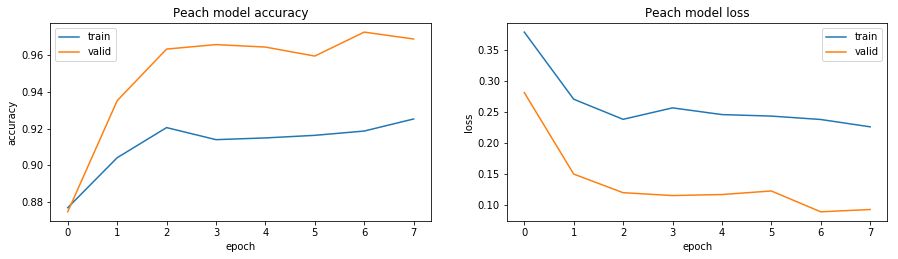

In [ ]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('Peach model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('Peach model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

Prediction tests

In [ ]:
thresh = 0.60
test_image = image.load_img('yolo_dataset/Dataset/train/Potato/potato_298.JPG',target_size=(224,224))  
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

train_set.class_indices
if result[0][0] >= thresh:
     prediction = 'Apple'
elif result[0][1] >= thresh :
        prediction = 'Cherry'
elif result[0][2] >= thresh :
        prediction = 'Grape'
elif result[0][3] >= thresh :
        prediction = 'Peach'    
elif result[0][4] >= thresh :
        prediction = 'Pepper'
elif result[0][5] >= thresh :
        prediction = 'Potato'  
elif result[0][6] >= thresh :
        prediction = 'Strawberry'  
else:
        prediction = 'Tomato'       


print(result)
print(prediction)
print(max(max(result)))
print(min(min(result)))

In [ ]:
model.save_weights("./peach.h5")